In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [33]:
data = pd.read_csv('Subscriber-final.csv', delimiter = ';')

In [34]:
data.head()

,event_type,user_id,dateandtime
0,subscribe,2458151268,2018.01.01 0:07
1,subscribe,2458151267,2018.01.01 0:07
2,subscribe,2458151309,2018.01.01 0:40
3,subscribe,2458151358,2018.01.01 1:26
4,subscribe,2458151361,2018.01.01 1:30


In [35]:
# Filter out records that are not 'subscribe' event type
subscribe_data = data[data['event_type'] == 'subscribe']

# Aggregate the number of subscriptions per day
daily_subscriptions = subscribe_data['dateandtime'].str.slice(0, 10).value_counts().sort_index()

# Convert the date to a datetime object and then to ordinal to be used in linear regression
dates = pd.to_datetime(daily_subscriptions.index)
dates_ordinal = dates.map(datetime.toordinal)

# Prepare the data for linear regression
X = dates_ordinal.values.reshape(-1, 1)  # Feature (dates)
y = daily_subscriptions.values           # Target (number of subscriptions)

# Display the prepared data for verification
pd.DataFrame({'Date': dates, 'Subscriptions': y})

,Date,Subscriptions
0,2018-01-01,60
1,2018-01-02,115
2,2018-01-03,181
3,2018-01-04,47
4,2018-01-05,42
...,...,...
84,2018-03-26,95
85,2018-03-27,171
86,2018-03-28,171
87,2018-03-29,135


In [36]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the number of subscriptions using the model
y_pred = model.predict(X)

# Calculate the performance of the model
r_squared = r2_score(y, y_pred)

# Display the R^2 value
r_squared

0.2347832772459526

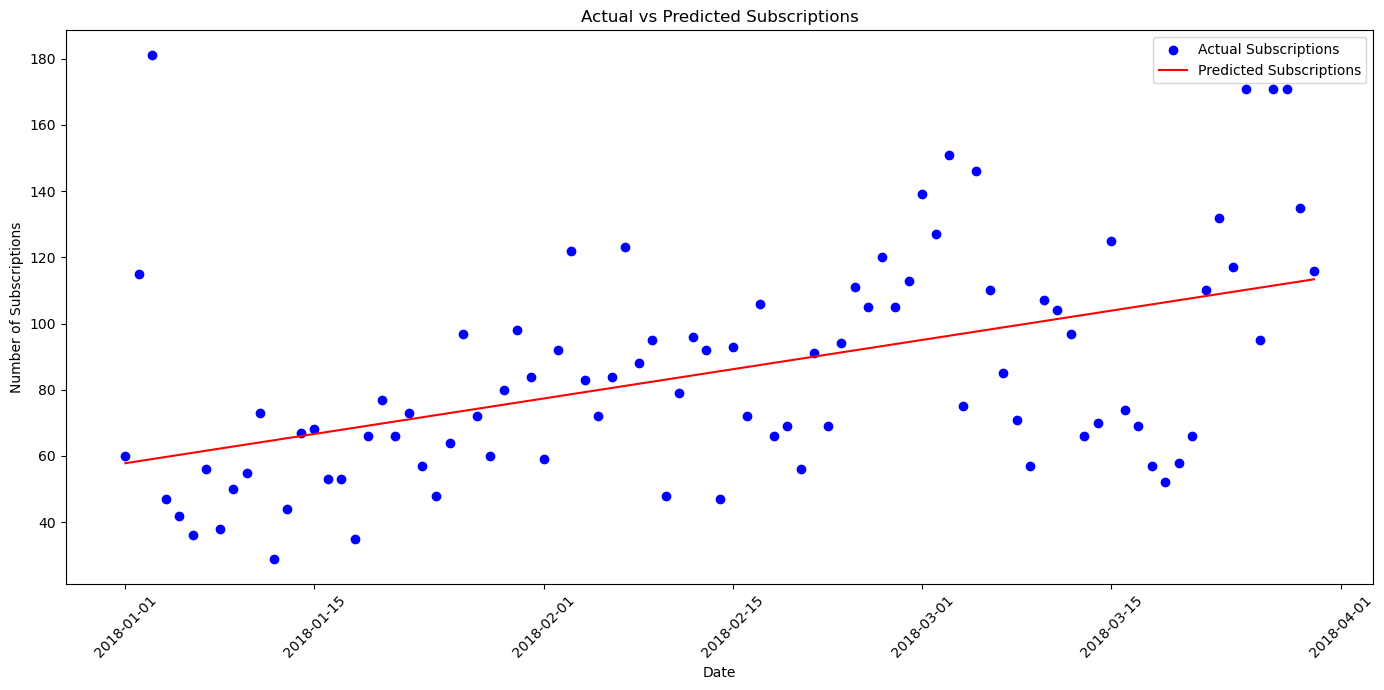

In [37]:
# Visualize the actual and predicted subscription counts
plt.figure(figsize=(14, 7))
plt.scatter(dates, y, color='blue', label='Actual Subscriptions')
plt.plot(dates, y_pred, color='red', label='Predicted Subscriptions')
plt.title('Actual vs Predicted Subscriptions')
plt.xlabel('Date')
plt.ylabel('Number of Subscriptions')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()